In [90]:
# Developed by Sruthi
# Dependencies and Setup
# !pip install plotly
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import requests
import time
import calendar
from pprint import pprint
import plotly.plotly as plotty
import plotly.graph_objs as go

import matplotlib.style as style
style.available
style.use('fivethirtyeight')

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [91]:
data_nyc=pd.read_csv('JFK_2010_2018_Dataset.csv')
data_lax=pd.read_csv('airline_details_LAX.csv')
data_chicago=pd.read_csv('chicago_2010_2018_data.csv')
data_atl=pd.read_csv('airline_details_ATL.csv')
# data_nyc = data_nyc.dropna(how='any')
data_nyc = data_nyc.rename(columns={ ' month':'month', ' weather_ct':'weather_ct', ' arr_delay':'arr_delay',
                                   ' carrier_delay':'carrier_delay'})
data_lax = data_lax.rename(columns={ ' month':'month', ' weather_ct':'weather_ct', ' arr_delay':'arr_delay',
                                   ' carrier_delay':'carrier_delay'})
data_chicago = data_chicago.rename(columns={ ' month':'month', ' weather_ct':'weather_ct', ' arr_delay':'arr_delay',
                                   ' carrier_delay':'carrier_delay'})
data_atl = data_atl.rename(columns={ ' month':'month', ' weather_ct':'weather_ct', ' arr_delay':'arr_delay',
                                   ' carrier_delay':'carrier_delay'})
data_nyc.columns
data_lax.columns
data_chicago.columns
data_atl.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

In [92]:
data_nyc = data_nyc[['year','month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted']]
data_lax = data_lax[['year','month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted']]
data_chicago = data_chicago[['year','month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted']]
data_atl = data_atl[['year','month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted']]

In [93]:
data_nyc = data_nyc[data_nyc['year'] != 2019] # data from 2010 to 2018 
data_lax = data_lax[data_lax['year'] != 2019] # data from 2010 to 2018 
data_chicago = data_chicago[data_chicago['year'] != 2019] # data from 2010 to 2018 
data_atl = data_atl[data_atl['year'] != 2019] # data from 2010 to 2018 
data_nyc.head()
data_lax.head()
data_chicago.head()
data_atl.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
0,2010,1,9E,Pinnacle Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1067.0,271.0,42.76,9.40,156.06,0.00,62.78,46.0,4.0
1,2010,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",524.0,75.0,31.23,8.31,19.42,0.00,16.04,21.0,2.0
2,2010,1,AS,Alaska Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",31.0,2.0,0.00,0.00,2.00,0.00,0.00,0.0,0.0
3,2010,1,CO,Continental Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",148.0,30.0,7.30,1.55,14.46,1.45,5.24,2.0,0.0
4,2010,1,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",12706.0,1925.0,463.26,73.66,933.45,2.00,452.63,370.0,37.0


In [94]:
# merge datasets
# new_city_ride_df = pd.merge(city_ride_df, city_data, how="left", on=["city", "city"])
# pd.merge(restaurant_ids_dataframe, restaurant_review_frame, on='business_id', how='outer', suffixes=('_restaurant_id', '_restaurant_review'))
# pandas.concat([df1, df2, df3, df4]) 
all_airports_df = pd.concat([data_nyc,data_lax,data_chicago,data_atl])
# all airports are in the dataframe
all_airports_df.head(15)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
0,2010,1,AA,American Airlines Inc.,JFK,"New York, NY: John F. Kennedy International",987.0,168.0,64.13,0.90,72.06,0.00,30.90,18.0,2.0
1,2010,1,B6,JetBlue Airways,JFK,"New York, NY: John F. Kennedy International",3670.0,885.0,178.12,8.76,360.61,2.31,335.19,51.0,11.0
2,2010,1,DL,Delta Air Lines Inc.,JFK,"New York, NY: John F. Kennedy International",1636.0,345.0,79.54,14.81,204.01,0.00,46.65,16.0,0.0
3,2010,1,MQ,American Eagle Airlines Inc.,JFK,"New York, NY: John F. Kennedy International",713.0,144.0,21.50,4.09,67.84,1.15,49.42,35.0,2.0
4,2010,1,OH,Comair Inc.,JFK,"New York, NY: John F. Kennedy International",1943.0,372.0,99.15,28.23,236.75,0.00,7.87,90.0,2.0
5,2010,1,UA,United Air Lines Inc.,JFK,"New York, NY: John F. Kennedy International",392.0,36.0,3.71,0.00,29.87,0.00,2.42,0.0,1.0
6,2010,1,US,US Airways Inc.,JFK,"New York, NY: John F. Kennedy International",120.0,33.0,4.99,0.00,23.29,0.00,4.72,0.0,0.0
7,2010,1,YV,Mesa Airlines Inc.,JFK,"New York, NY: John F. Kennedy International",101.0,24.0,9.00,1.00,14.00,0.00,0.00,0.0,0.0
8,2010,2,AA,American Airlines Inc.,JFK,"New York, NY: John F. Kennedy International",888.0,167.0,62.15,6.17,71.55,0.00,27.13,79.0,2.0
9,2010,2,B6,JetBlue Airways,JFK,"New York, NY: John F. Kennedy International",3424.0,862.0,192.03,9.90,308.60,1.39,350.08,205.0,7.0


In [95]:
all_airports_df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
count,4782.000000,4782.000000,4780.000000,4779.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000
mean,2013.837307,6.474697,1894.580126,354.815443,81.321590,9.633556,136.931146,0.493471,126.361628,34.052510,4.086192
std,2.633963,3.450685,3140.242386,528.681741,121.852586,18.426411,206.185792,1.016857,208.967113,85.939384,9.475826
min,2010.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,3.000000,186.000000,43.000000,12.465000,0.320000,15.955000,0.000000,8.960000,1.000000,0.000000
50%,2014.000000,6.000000,587.000000,123.000000,31.960000,3.000000,51.245000,0.000000,29.425000,6.000000,1.000000
75%,2016.000000,9.000000,2594.250000,479.000000,105.502500,10.402500,179.345000,0.660000,153.582500,30.000000,4.000000
max,2018.000000,12.000000,21977.000000,5268.000000,1242.160000,240.790000,2401.790000,11.560000,1583.510000,1328.000000,146.000000


In [96]:
all_airports_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4782 entries, 0 to 1295
Data columns (total 15 columns):
year                4782 non-null int64
month               4782 non-null int64
carrier             4782 non-null object
carrier_name        4782 non-null object
airport             4782 non-null object
airport_name        4782 non-null object
arr_flights         4780 non-null float64
arr_del15           4779 non-null float64
carrier_ct          4780 non-null float64
weather_ct          4780 non-null float64
nas_ct              4780 non-null float64
security_ct         4780 non-null float64
late_aircraft_ct    4780 non-null float64
arr_cancelled       4780 non-null float64
arr_diverted        4780 non-null float64
dtypes: float64(9), int64(2), object(4)
memory usage: 597.8+ KB


In [97]:
# pull labels and metrics for plotting
# flight details:
total_arrivals = all_airports_df['arr_flights'].sum()
total_delays = all_airports_df['arr_del15'].sum()
total_carrier_delays = all_airports_df['carrier_ct'].sum()
total_weather_delays = all_airports_df['weather_ct'].sum()
total_nas_delays = all_airports_df['nas_ct'].sum()
total_security_delays = all_airports_df['security_ct'].sum()
total_late_aircraft_delays = all_airports_df['late_aircraft_ct'].sum()

carrier_names = all_airports_df["carrier_name"].unique()

In [98]:
# print(all_airports_df["month"].unique(),all_airports_df["year"].unique())
print(all_airports_df["airport"].unique())

['JFK' 'LAX' 'ORD' 'ATL']


In [99]:
print(all_airports_df["carrier_name"].unique())

['American Airlines Inc.' 'JetBlue Airways' 'Delta Air Lines Inc.'
 'American Eagle Airlines Inc.' 'Comair Inc.' 'United Air Lines Inc.'
 'US Airways Inc.' 'Mesa Airlines Inc.' 'Atlantic Southeast Airlines'
 'Pinnacle Airlines Inc.' 'ExpressJet Airlines Inc.' 'Virgin America'
 'Hawaiian Airlines Inc.' 'Endeavor Air Inc.' 'Envoy Air'
 'Alaska Airlines Inc.' 'PSA Airlines Inc.' 'Republic Airline'
 'SkyWest Airlines Inc.' 'Continental Air Lines Inc.'
 'Frontier Airlines Inc.' 'AirTran Airways Corporation'
 'Southwest Airlines Co.' 'Spirit Air Lines' 'Allegiant Air']


In [100]:
# y_axis = rides_df["fare"]
# x_axis = rides_df["ride_id"]
# circle_size = 10 *rides_df["driver_count_x"]

# # # Build the scatter plots for each city types
# fig, ax = plt.subplots()
# rides_urb = rides_df[rides_df["type"] == "Urban"]
# rides_sub = rides_df[rides_df["type"] == "Suburban"]
# rides_rur = rides_df[rides_df["type"] == "Rural"]

# plt.scatter(rides_urb["ride_id"],rides_urb["fare"], s = 10* rides_urb["driver_count_x"],c="Coral", edgecolors="black", alpha =.75, linewidths = 1, label = "Urban")
# plt.scatter(rides_sub["ride_id"],rides_sub["fare"],s = 10* rides_sub["driver_count_x"],c="SkyBlue",edgecolors="black", alpha =.75, linewidths = 1, label = "Suburban")
# plt.scatter(rides_rur["ride_id"],rides_rur["fare"],s = 10* rides_rur["driver_count_x"],c="Gold", edgecolors="black", alpha =.75, linewidths = 1, label = "Rural")


# x_axis = all_airports_df["year"]
# x_axis_month = all_airports_df["month"]
# x_axis_exp = all_airports_df["month"].unique(),all_airports_df["year"].unique()
# y_axis = all_airports_df["month"]
# circle_size = 5 * total_delays

In [101]:
all_airports_df = pd.concat([data_nyc,data_lax,data_chicago,data_atl])

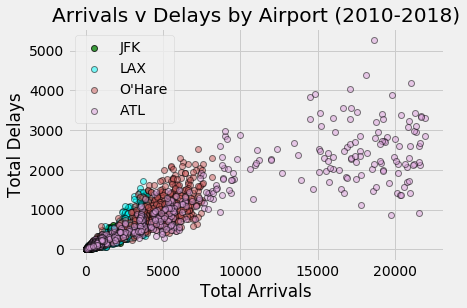

<Figure size 432x288 with 0 Axes>

In [103]:
fig, ax = plt.subplots()
nyc_airport = all_airports_df[all_airports_df["airport"] == "JFK"]
lax_airport = all_airports_df[all_airports_df["airport"] == "LAX"]
chicago_airport = all_airports_df[all_airports_df["airport"] == "ORD"]
atl_airport = all_airports_df[all_airports_df["airport"] == "ATL"]

plt.scatter(nyc_airport["arr_flights"],nyc_airport["arr_del15"],c="green", edgecolors="black", alpha =.75, linewidths = 1, label = "JFK")
plt.scatter(lax_airport["arr_flights"],lax_airport["arr_del15"],c="cyan", edgecolors="black", alpha =.5, linewidths = 1, label = "LAX")
plt.scatter(chicago_airport["arr_flights"],chicago_airport["arr_del15"],c="indianred", edgecolors="black", alpha =.5, linewidths = 1, label = "O'Hare")
plt.scatter(atl_airport["arr_flights"],atl_airport["arr_del15"],c="plum", edgecolors="black", alpha =.5, linewidths = 1, label = "ATL")
plt.title('Arrivals v Delays by Airport (2010-2018)')
plt.xlabel('Total Arrivals')
plt.ylabel('Total Delays')
plt.legend()
plt.show()
plt.savefig("arrivals_vdelays_all_airports.jpg")